# Solving for irreps using a permutation representation

Here we can use scipy to obtain a numpy matrix group of Icosahedral rotations. This is a three by three representation of the icosahedral group and can be used to study how the group acts on itself.

In [1]:
from scipy.spatial.transform import Rotation as R
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import Symbol

In [2]:
icosahedral_group = R.create_group('I') #rotation group only, 60 elements

rotation_matrices = icosahedral_group.as_matrix()

matdict = {f'mat_{i}':rotation_matrices[i].astype(np.float64) for i in range(60)}

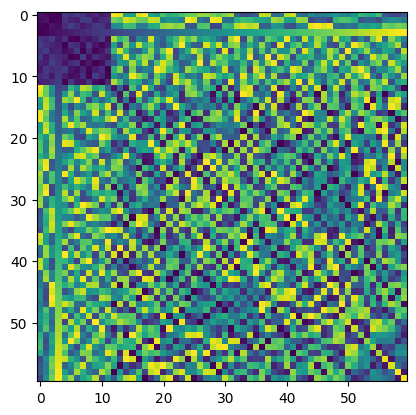

In [7]:
# Combines each element with each other element, records the index of the result, yielding a matrix
P = np.zeros((60,60))
for i in range(60):
    seen = set()
    for j in range(60):
        val = next((k for k in range(60) if np.allclose(rotation_matrices[k],rotation_matrices[i]@rotation_matrices[j],1e-7)), None)
        P[i,j] = val
        seen.add(val)

plt.imshow(P)

In [9]:
#permutation representation elements, iterating over the rows of P and creates a permutation matrix for each row, i, by treating the (i,j)th entry of P as an index for a 1 in the jth row of the matrix for i
prep_elements = []
for row in P.tolist():
    pmat = sp.zeros(60,60)
    for i in range(60):
        pmat[i,int(row[i])] = 1
    prep_elements.append(pmat)
print(len(prep_elements))


60


In [23]:
display(prep_elements[0])

Matrix([
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
# form of irreducible representation, to solve for each element
block_sizes = [1,*[3]*6,*[4]*4,*[5]*5]

# Create a list to store the blocks
blocks = []
k=0
n=0
symbols = []
# For each block size
for size in block_sizes:
    # Create a matrix of the given size with symbolic elements
    block = sp.zeros(size, size)
    for i in range(size):
        for j in range(size):
            symbol = sp.var(f'a_{size+k}_{i}{j}')
            block[i,j] = symbol
            if symbol not in symbols:
                symbols.append(symbol)
    #block = sp.Matrix(size, size, lambda i, j: sp.symbols(f'a_{size+k}_{i}{j}'))
    # Add the block to the list of blocks
    blocks.append(block)
    if size == 3:
        n += 1
        if n == 3:
            k=1


# Create a block diagonal matrix from the blocks
matrix = sp.BlockDiagMatrix(*blocks)

# Print the matrix
display(matrix)

Matrix([
[Matrix([[a_1_00]]),                                                                                       0,                                                                                       0,                                                                                       0,                                                                                       0,                                                                                       0,                                                                                       0,                                                                                                                                                 0,                                                                                                                                                 0,                                                                                                                                               

In [50]:
print(len(symbols))

60


In [37]:
# extract the variables in matrix in a list

symbols = []
k=0
for size in [1,3,3,4,5]:
    for i in range(size):
        for j in range(size):
            symbols.append(sp.Symbol(f'a_{size+k}_{i}{j}'))
    if size == 3:
        k=1
display(symbols)
#check for duplicates
len(symbols)

[a_1_00,
 a_3_00,
 a_3_01,
 a_3_02,
 a_3_10,
 a_3_11,
 a_3_12,
 a_3_20,
 a_3_21,
 a_3_22,
 a_4_00,
 a_4_01,
 a_4_02,
 a_4_10,
 a_4_11,
 a_4_12,
 a_4_20,
 a_4_21,
 a_4_22,
 a_5_00,
 a_5_01,
 a_5_02,
 a_5_03,
 a_5_10,
 a_5_11,
 a_5_12,
 a_5_13,
 a_5_20,
 a_5_21,
 a_5_22,
 a_5_23,
 a_5_30,
 a_5_31,
 a_5_32,
 a_5_33,
 a_6_00,
 a_6_01,
 a_6_02,
 a_6_03,
 a_6_04,
 a_6_10,
 a_6_11,
 a_6_12,
 a_6_13,
 a_6_14,
 a_6_20,
 a_6_21,
 a_6_22,
 a_6_23,
 a_6_24,
 a_6_30,
 a_6_31,
 a_6_32,
 a_6_33,
 a_6_34,
 a_6_40,
 a_6_41,
 a_6_42,
 a_6_43,
 a_6_44]

60

# Here we have the matrices well phrased, test various ways to solve it that will reduce computational complexity

In [10]:
regrep_elements = []
for i in range(60):

    X = matrix.copy()
    vars = sp.Matrix(X).solve(sp.Matrix(prep_elements[i]))

    print(vars)

NameError: name 'matrix' is not defined

In [53]:
regrep_elements = []
x = sp.Matrix(60, 1, [sp.Symbol(f'x{i}') for i in range(60)])
for i in range(60):
    matrix_x = matrix * x
    Px = prep_elements[i] * x

    # Set up the equations Dx = Px
    equations = [sp.Eq(matrix_x[i,0], Px[i,0]) for i in range(60)]

    vars = sp.solve(equations, symbols)
    print('yooo')
    print(vars)

KeyboardInterrupt: 

In [45]:
len(symbols)

60